In [1]:
# import packages
import matplotlib.pyplot as plt
from utils_decoupled_kgfn import read_result

## Plotting AckMat, FreeSolv and Manu problems [Figure 1]

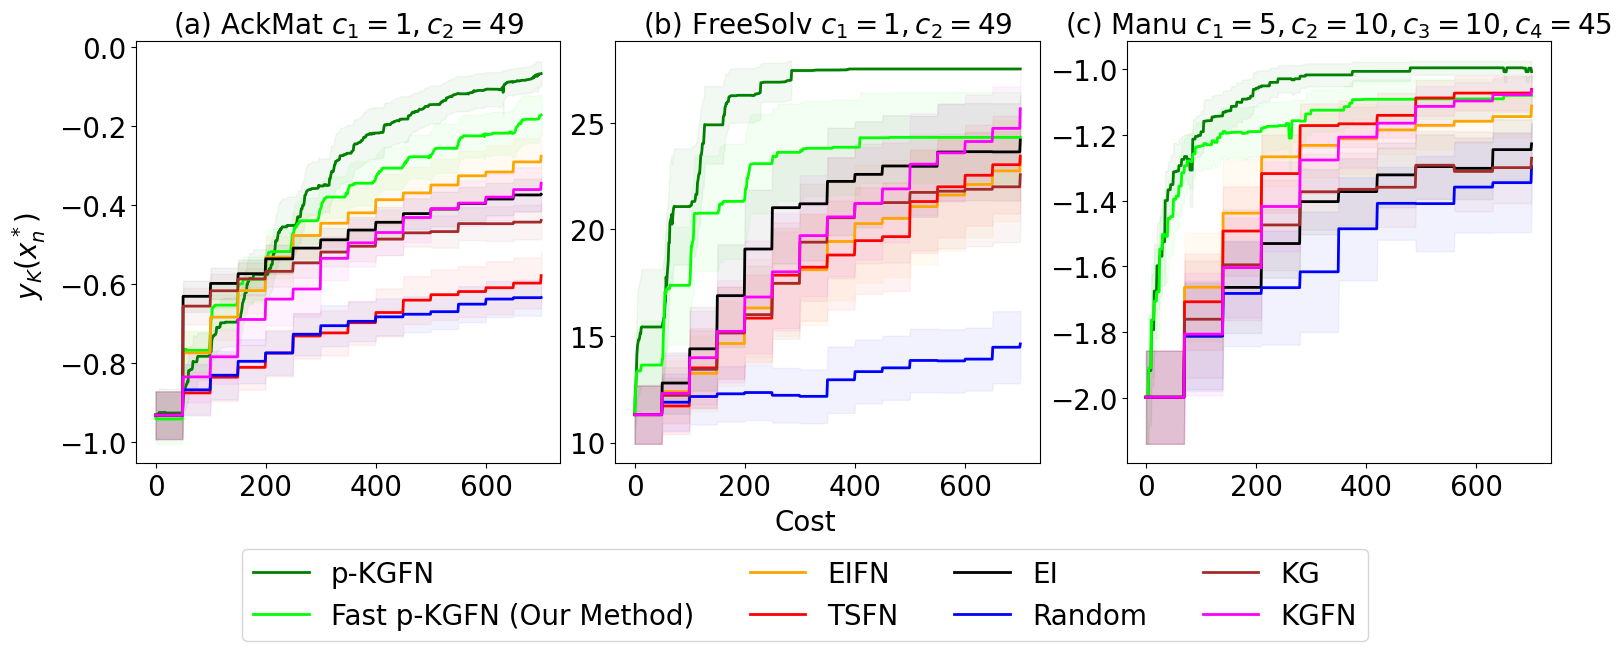

In [3]:
trial_list = list(range(1,31))
cost_problem ={'AckMat': ['1_49'],'freesolv':['1_49'],'Manu':['5_10_10_45']}
title = {'AckMat':"(a) AckMat $c_1 = 1, c_2=49$",'freesolv': "(b) FreeSolv $c_1=1, c_2=49$",'Manu': "(c) Manu $c_1 = 5, c_2 = 10, c_3 = 10, c_4 = 45$"}
algo_list=["pKGFN","fast_pKGFN","EIFN","TSFN","EI","Random","KG","KGFN"]
algo_name = {"pKGFN":'p-KGFN',"EIFN":'EIFN',"TSFN":'TSFN',"EI":'EI',"Random":'Random',
             "KG":"KG","KGFN":"KGFN","fast_pKGFN":'Fast p-KGFN (Our Method)'}
res = {}
for problem in ['AckMat','freesolv','Manu',]:
    res[problem]={}
    for cost in cost_problem[problem]:
        if cost == '1_1':
            cost_axes=list(range(0,101,1))
        elif cost == '1_9' or cost=='9_1':
            cost_axes=list(range(0,151,1))
        elif cost == '1_49' or cost == '5_10_10_45':
            cost_axes=list(range(0,701,1))
        res[problem][cost]=read_result(problem=problem,cost=cost,cost_axes=cost_axes,trial_list=trial_list, algo_list=algo_list)
metric  = 'inference regret'
fig, plot_no = plt.subplots(nrows=1, ncols=3,layout="constrained",figsize=(15, 5))
no_trial = len(trial_list)
colors = {'EIFN':'orange','pKGFN':'green','TSFN':'red','Random': 'blue',
          "KGFN": 'magenta',"EI": "black","KG":"brown","fast_pKGFN":'lime'}
idx = 0 
for problem in ['AckMat','freesolv','Manu']:
    for cost in cost_problem[problem]:
        if cost == '1_1':
            cost_axes=list(range(0,101,1))
        elif cost == '1_9':
            cost_axes=list(range(0,151,1))
        elif cost == '1_49' or cost == '5_10_10_45':
            cost_axes=list(range(0,701,1))
        for algo in algo_list:
            plot_no[idx].set_title(title[problem],fontsize=20)
            plot_no[idx].tick_params(axis='both', which='both', labelsize=20)
            plot_no[idx].plot(cost_axes, res[problem][cost][algo]['mean_obj_at_best'], label = algo_name[algo],color=colors[algo],linewidth=2)
            plot_no[idx].fill_between(cost_axes, res[problem][cost][algo]['lo_obj_at_best'], res[problem][cost][algo]['up_obj_at_best'],alpha=0.05,color=colors[algo])
            plot_no[idx].set(adjustable = 'box')
            handles, labels = plot_no[idx].get_legend_handles_labels()
    idx +=1
fig.legend(handles, labels, loc='lower center',ncol=4,bbox_to_anchor=[0.5, -0.3],prop={'size': 20})
fig.text(0.5, -0.05, 'Cost', ha='center',fontsize=20)
fig.text(-0.03, 0.5, '$y_K(x^*_n)$', va='center', rotation='vertical',fontsize=20)
fig.savefig(f"./result_3pbs_autoML_pkgei.pdf",dpi = 300,bbox_inches='tight')

## Plotting AckMat and FreeSolv cost sensitivity [Figure 2]

AckMat
1_1
1_9
1_49
1_1
1_9
1_49
freesolv
1_1
1_9
1_49
1_1
1_9
1_49


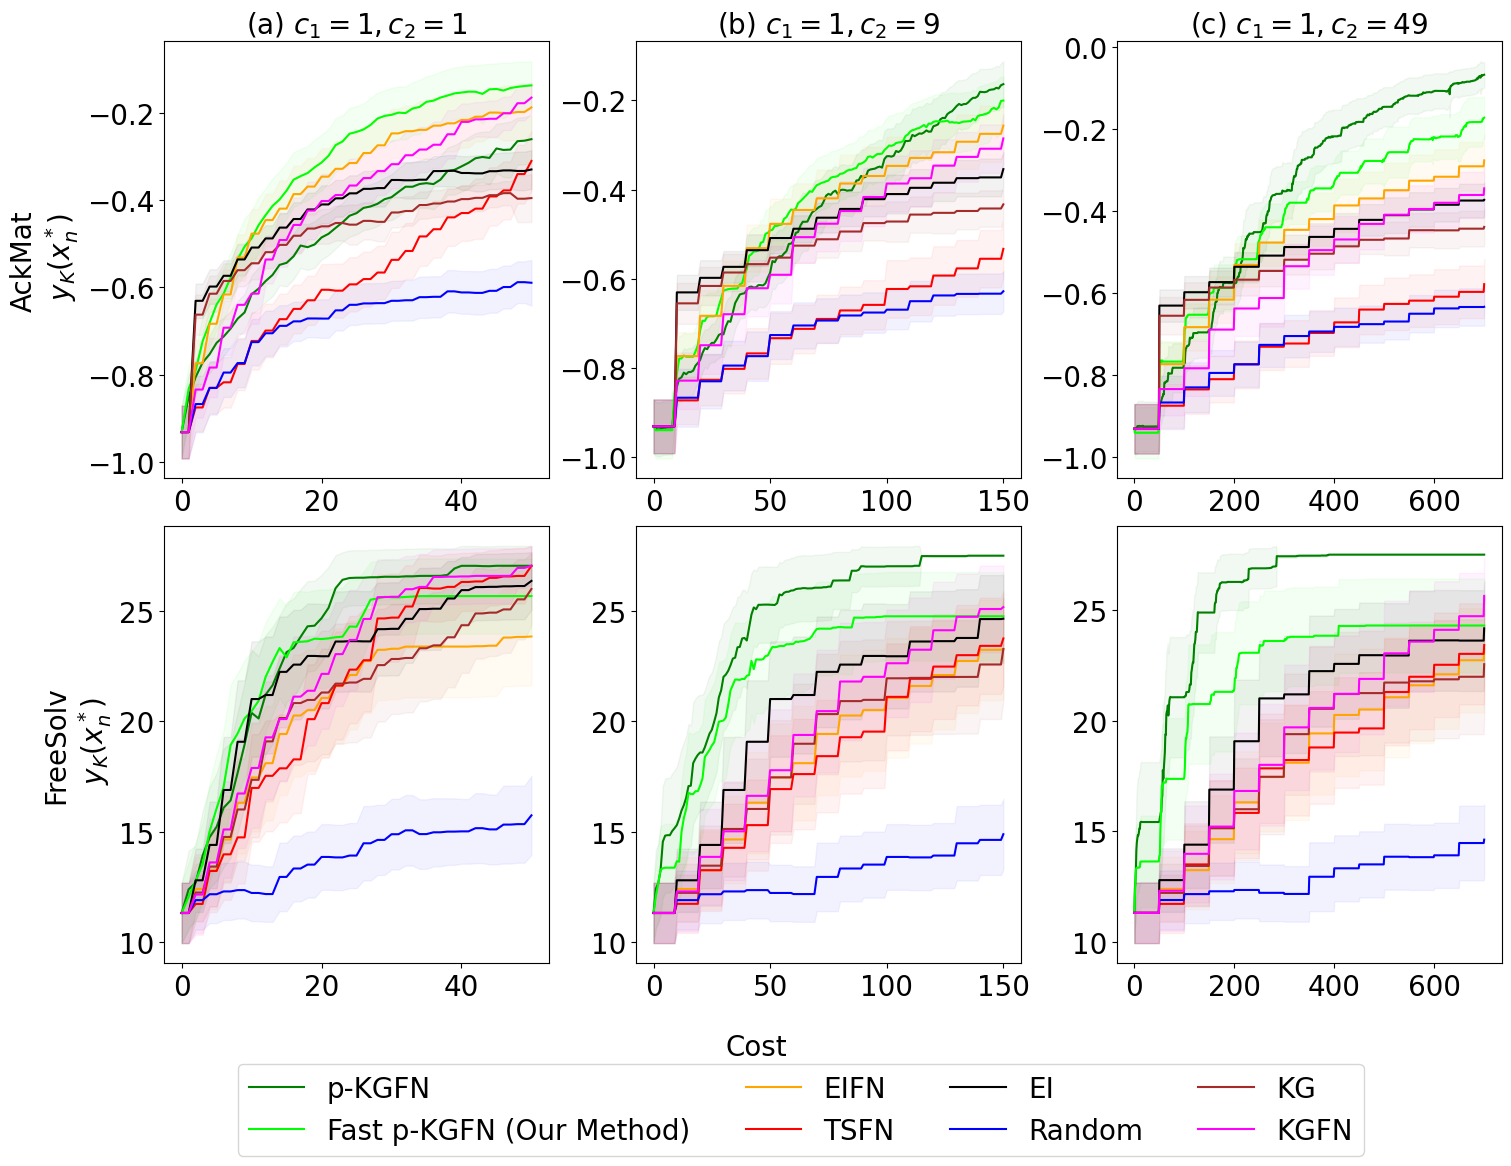

In [4]:
trial_list = list(range(1,31))
cost_problem ={'AckMat': ['1_1','1_9','1_49'],'freesolv':['1_1','1_9','1_49']}
title ={'1_1':'(a) $c_1 = 1, c_2 = 1$','1_9': "(b) $c_1 = 1, c_2 = 9$", "1_49": "(c) $c_1 = 1, c_2 = 49$"}
algo_list=["pKGFN","fast_pKGFN","EIFN","TSFN","EI","Random","KG","KGFN"]
algo_name = {"pKGFN":'p-KGFN',"EIFN":'EIFN',"TSFN":'TSFN',"EI":'EI',"Random":'Random',
             "KG":"KG","KGFN":"KGFN","fast_pKGFN":"Fast p-KGFN (Our Method)"}
problem_name={'AckMat':'AckMat','freesolv':'FreeSolv'}
metric_list=['Inference Regret']
fig, plot_no = plt.subplots(nrows=2, ncols=3,layout="constrained",figsize=(15, 10))
no_trial = len(trial_list)
colors = {'EIFN':'orange','pKGFN':'green','TSFN':'red','Random': 'blue',
          "KGFN": 'magenta',"EI": "black","KG":"brown","fast_pKGFN":'lime'}
idx_row = 0 
res={}
for problem in ['AckMat','freesolv']:
    res[problem]={}
    print(problem)
    for cost in cost_problem[problem]:
        print(cost)
        if cost == '1_1':
            cost_axes=list(range(0,51,1))
        elif cost == '1_9':
            cost_axes=list(range(0,151,1))
        elif cost == '1_49' or cost == '5_10_10_45':
            cost_axes=list(range(0,701,1))
        res[problem][cost]=read_result(problem=problem,cost=cost,cost_axes=cost_axes,trial_list=trial_list, algo_list=algo_list)
    idx_column = 0
    for cost in cost_problem[problem]:
        print(cost)
        if cost == '1_1':
            cost_axes=list(range(0,51,1))
        elif cost == '1_9' or cost =='9_1':
            cost_axes=list(range(0,151,1))
        elif cost == '1_49' or cost == '5_10_10_45':
            cost_axes=list(range(0,701,1))
        for metric in metric_list:
            for algo in algo_list:
                plot_no[idx_row][idx_column].plot(cost_axes, res[problem][cost][algo]['mean_obj_at_best'], label = algo_name[algo],color=colors[algo])
                plot_no[idx_row][idx_column].tick_params(axis='both', which='both', labelsize=20)
                plot_no[idx_row][idx_column].fill_between(cost_axes, res[problem][cost][algo]['lo_obj_at_best'], res[problem][cost][algo]['up_obj_at_best'],alpha=0.05,color=colors[algo])
                plot_no[idx_row][idx_column].set(adjustable = 'box')
                handles, labels = plot_no[idx_row][idx_column].get_legend_handles_labels()
        if idx_row==0:            
            plot_no[idx_row,idx_column].set_title(title[cost],fontsize=20)
        idx_column +=1
    plot_no[idx_row,0].set_ylabel(f"{problem_name[problem]}\n $y_K(x^*_n)$",multialignment='center',fontsize=20)
    idx_row+=1
fig.legend(handles, labels, loc='lower center',ncol=4,bbox_to_anchor=[0.53, -0.165],prop={'size': 20})
fig.text(0.5, -0.05, 'Cost', ha='center',fontsize=20)
fig.savefig(f"./result_autoML_cost_sen_AM_FreeSolv_pKGEI.pdf",dpi = 300,bbox_inches='tight')